## State-wise analysis

/tmp/ipykernel_36028/999655454.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=statewise_copd.values, y=statewise_copd.index, palette='viridis')


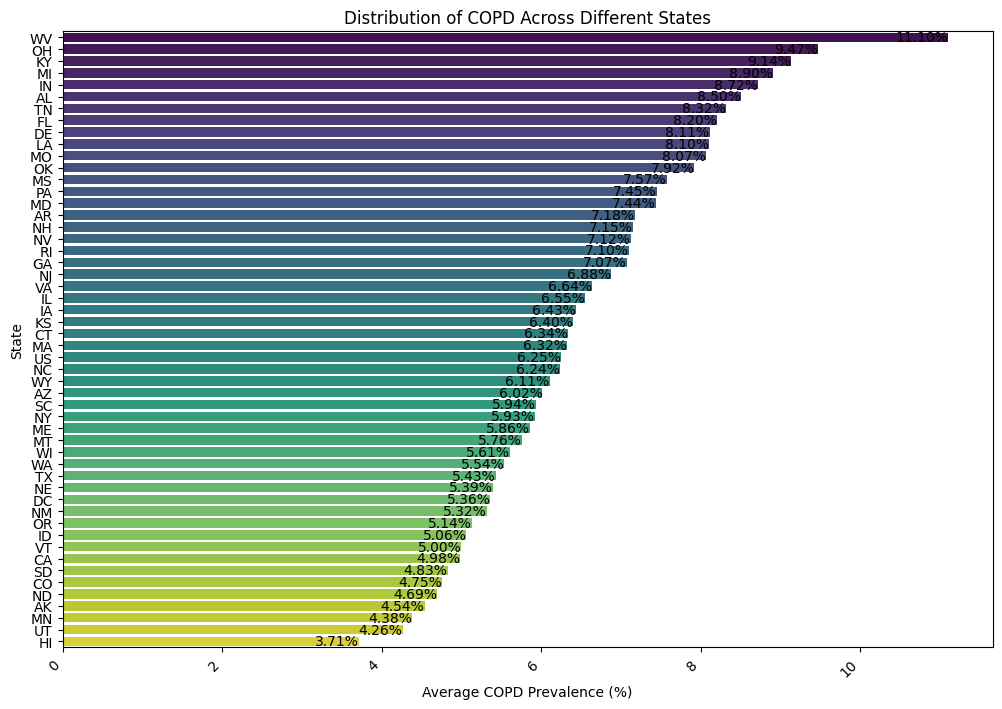

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with the correct file path
file_path = "../data/COPD.csv"
copd_data = pd.read_csv(file_path)

# State-wise analysis
statewise_copd = (
    copd_data.groupby("StateAbbr")["Data_Value"].mean().sort_values(ascending=False)
)

# Plot the distribution by state with a horizontal bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x=statewise_copd.values, y=statewise_copd.index, palette="viridis"
)
plt.title("Distribution of COPD Across Different States")
plt.xlabel("Average COPD Prevalence (%)")
plt.ylabel("State")

# Annotate percentages on the bars
for i, value in enumerate(statewise_copd.values):
    barplot.text(
        value, i, f"{value:.2f}%", va="center", fontsize=10, color="black", ha="right"
    )

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()

## City-wise analysis

/tmp/ipykernel_36028/509521329.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=citywise_copd.index, y=citywise_copd.values, palette='viridis')


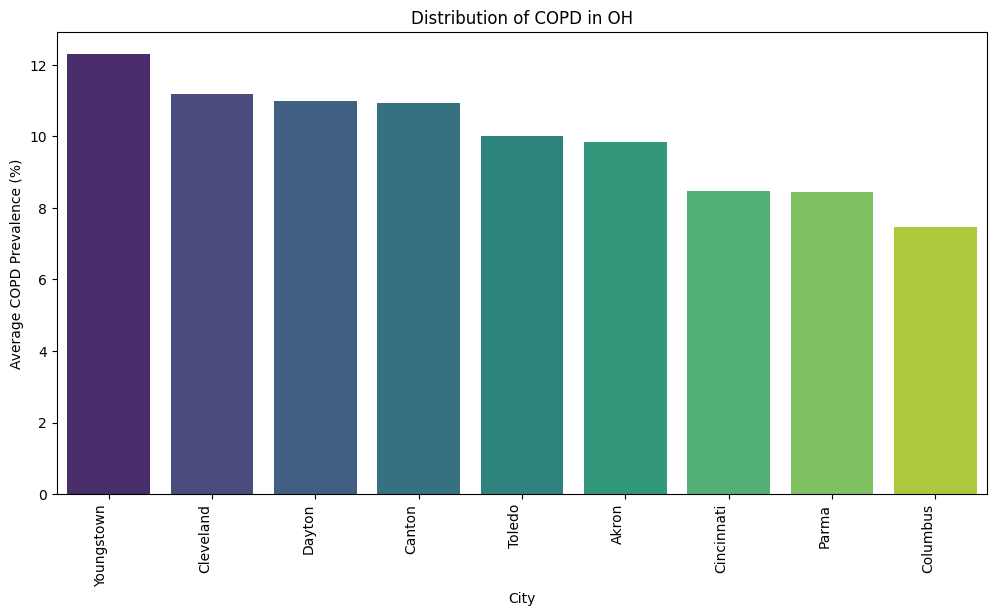

In [6]:
# City-wise analysis for a specific state
selected_state = "OH"
citywise_copd = (
    copd_data[copd_data["StateAbbr"] == selected_state]
    .groupby("CityName")["Data_Value"]
    .mean()
    .sort_values(ascending=False)
)

# Plot the distribution by city within the selected state
plt.figure(figsize=(12, 6))
sns.barplot(x=citywise_copd.index, y=citywise_copd.values, palette="viridis")
plt.title(f"Distribution of COPD in {selected_state}")
plt.xlabel("City")
plt.ylabel("Average COPD Prevalence (%)")
plt.xticks(rotation=90, ha="right")
plt.show()

/tmp/ipykernel_36028/3921001619.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_n_cities_states['Data_Value'], y=top_n_cities_states['CityState'], palette='viridis')


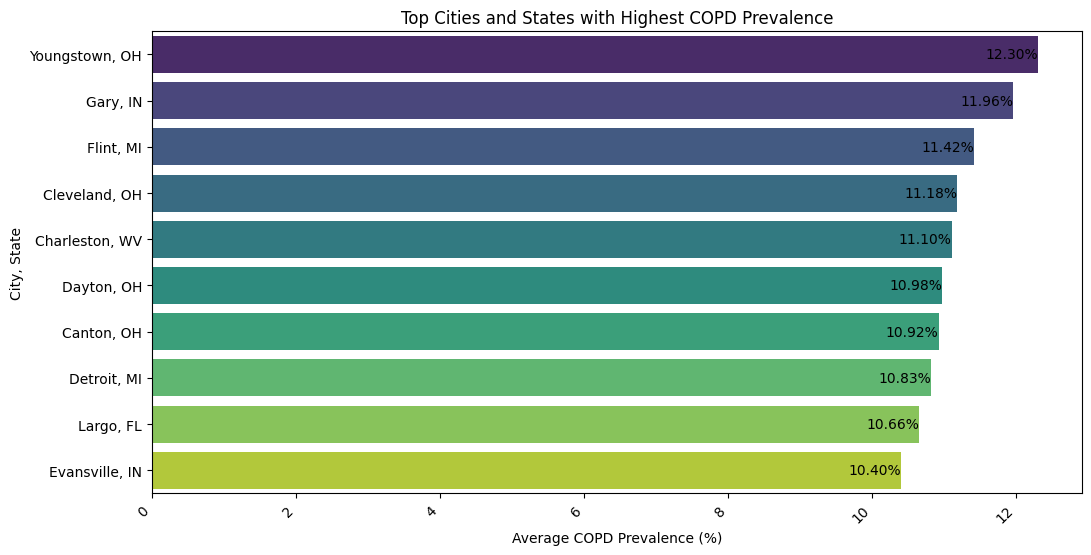

In [7]:
# City-wise analysis for all states
citystatewise_copd = (
    copd_data.groupby(["StateAbbr", "CityName"])["Data_Value"]
    .mean()
    .sort_values(ascending=False)
)

# Select the top N cities and states
top_n_cities_states = citystatewise_copd.head(10)

# Convert the Series to a DataFrame and reset the index
top_n_cities_states = top_n_cities_states.reset_index()

# Create a new column combining city and state information
top_n_cities_states["CityState"] = (
    top_n_cities_states["CityName"] + ", " + top_n_cities_states["StateAbbr"]
)

# Plot the distribution by city and state
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x=top_n_cities_states["Data_Value"],
    y=top_n_cities_states["CityState"],
    palette="viridis",
)
plt.title("Top Cities and States with Highest COPD Prevalence")
plt.xlabel("Average COPD Prevalence (%)")
plt.ylabel("City, State")

# Annotate percentages on the bars
for i, value in enumerate(top_n_cities_states["Data_Value"]):
    barplot.text(
        value, i, f"{value:.2f}%", va="center", fontsize=10, color="black", ha="right"
    )

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()